In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Memuat data pelatihan (berisi informasi harga dari beberapa tempat belanja)
training_data = pd.read_csv('training_data.csv')

# Menyiapkan fitur dan label untuk model
features = training_data.drop(['item', 'cheapest_store'], axis=1).values
labels = training_data['cheapest_store'].values

# Normalisasi fitur
features = (features - features.mean()) / features.std()

# One-hot encode the categorical labels
labels = pd.get_dummies(labels)

In [4]:
# Membagi data menjadi data pelatihan dan data validasi
train_size = int(0.8 * len(features))
train_features = features[:train_size]
train_labels = labels[:train_size]
val_features = features[train_size:]
val_labels = labels[train_size:]

In [43]:
# Membangun model menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(labels.shape[1], activation='linear')
])

In [44]:
# Mengkompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
# Melatih model
model.fit(train_features, train_labels, epochs=10, batch_size=20, validation_data=(val_features, val_labels))
history = model.fit(train_features, train_labels, epochs=10, batch_size=20, validation_data=(val_features, val_labels))

Epoch 1/10
25/25 [==============================] - 0s 5ms/step - loss: 1.1009e-09 - val_loss: 1.1896e-09
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 9.8645e-10 - val_loss: 5.5060e-10
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 4.6746e-10 - val_loss: 3.6587e-10
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 4.0394e-10 - val_loss: 2.7083e-10
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 1.1304e-10 - val_loss: 3.9219e-11
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 5.8509e-11 - val_loss: 5.4895e-11
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 5.9131e-11 - val_loss: 5.6777e-11
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 1.2424e-10 - val_loss: 1.8791e-10
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 1.0577e-10 - val_loss: 6.5271e-11
Epoch 10/10
25/25 [===========================

In [68]:
# Menggunakan model untuk memberikan rekomendasi tempat belanja per item
def get_cheapest_stores(features):
    normalized_features = (np.array(features) - np.mean(features)) / np.std(features)
    price_predictions = model.predict(normalized_features.reshape(1, -1))
    cheapest_store_index = np.argmin(price_predictions)
    return training_data['cheapest_store'][cheapest_store_index]

In [69]:
## Memplot akurasi
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()


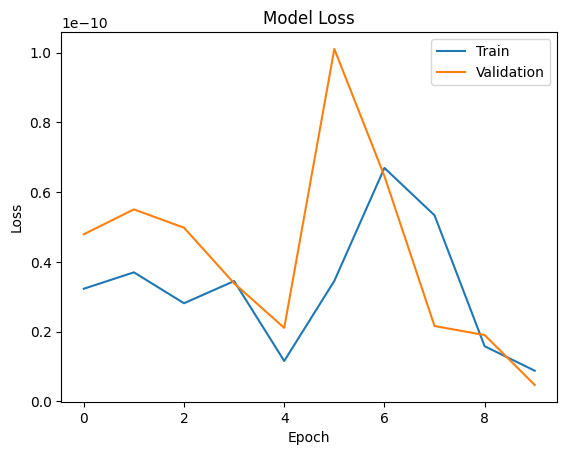

In [70]:
# Memplot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [66]:
# Contoh penggunaan
user_features = [3,6,7]  # Contoh fitur harga item dari pengguna
cheapest_stores = get_cheapest_stores(user_features)
print(f"Rekomendasi tempat belanja dengan harga termurah per item: {cheapest_stores}")

1/1 [==============================] - 0s 19ms/step
Rekomendasi tempat belanja dengan harga termurah per item: Store C
